# Demo LSA
Using LSA for VNese News and classification

## I. Pre-processing Datas
Nếu chưa có dữ liệu sẵn hoặc muốn tự chạy với bộ dữ liệu cá nhân, hãy chạy phần này.  
Nếu đã có dữ liệu tạo sẵn hãy xuống phần 2

In [1]:
import os
from tqdm import tqdm 

In [3]:
# Load data from files
data = []
data_path = 'data/raws/Train_Full'
folders = os.listdir(data_path)
for i, folder in enumerate(folders):
    print("Loading %s (%d/%d):"%(folder, i+1, len(folders)))
    filenames = os.listdir('%s/%s/'%(data_path, folder))
    for filename in tqdm(filenames):
        filepath = '%s/%s/%s'%(data_path, folder, filename)
        doc = open(filepath, 'r', encoding='utf-16').read()
        data.append(doc)
print("Load %d files complete !"%len(data)) 

  0%|          | 5/5219 [00:00<01:47, 48.61it/s]

Loading Chinh tri Xa hoi (1/10):


  1%|          | 26/2481 [00:00<00:09, 245.81it/s]

Loading Vi tinh (2/10):


  1%|          | 20/3159 [00:00<00:17, 183.94it/s]

Loading Doi song (3/10):


  1%|          | 17/3080 [00:00<00:18, 162.02it/s]

Loading Van hoa (4/10):


  0%|          | 0/2552 [00:00<?, ?it/s]

Loading Phap luat (5/10):
Loading Kinh doanh (6/10):


  0%|          | 0/3384 [00:00<?, ?it/s]

Loading Khoa hoc (7/10):
Loading The gioi (8/10):
Loading Suc khoe (9/10):


100%|██████████| 5298/5298 [00:00<00:00, 31051.90it/s]

Loading The thao (10/10):
Load 33759 files complete !


In [6]:
# Sample data
data[0]

'Hà Nội sắp ngừng đăng ký xe máy tại 3 quận \nTheo Phó chủ tịch UBND thành phố Đỗ Hoàng Ân, đầu năm 2005 có thể tiếp tục hạn chế đăng ký xe máy mới tại 3 quận Cầu Giấy, Thanh Xuân, Tây Hồ theo lộ trình. Hiện các ban ngành thành phố đang nghiên cứu để đưa ra thời điểm chính thức. \n- Thưa ông, tại sao phải ngừng đăng ký xe máy thêm 3 quận nội thành? \n- Theo Nghị quyết HĐND, thành phố sẽ ngừng đăng ký xe máy mới tại các quận theo lộ trình nhằm hạn chế phương tiện cá nhân. Hiện nay, quản lý của nhà nước chưa rõ, phương tiện do người dân mua nhiều gây rối loạn thị trường và ùn tắc giao thông. \n- Hạn chế xe mới ở nội thành thì có thể xe ngoại tỉnh tràn vào thành phố, có ý kiến nên hạn chế cả xe ngoại tỉnh, ông nghĩ sao?\n- Không thể hạn chế xe ngoại tỉnh vì người dân sống trong và ngoài thành phố vẫn sử dụng phương tiện theo nhu cầu cuộc sống. \nSong có lẽ trong thành phố nghĩ đến hạn chế bớt phương tiện vào khu vực trung tâm, tạo ra những tuyến chuyên dành cho xe buýt để hạn chế giao thô

In [7]:
output_path = 'data/'

In [9]:
# Load Vietnamese Stopwords
filename = 'data/raws/vietnamese-stopwords.txt'
temps = open(filename, 'r', encoding='utf-8').readlines()
stopwords = [t.rstrip() for t in temps]
stopwords[:5]

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy']

In [10]:
# Pre-processing loaded datas
from underthesea import word_tokenize
import re
import json

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stopwords and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text

# For gensim we need to tokenize the data and filter out stopwords
tokenized_data = []
for text in tqdm(data):
    tokenized_data.append(clean_text(text))

100%|██████████| 33759/33759 [28:41<00:00, 19.61it/s]  


In [14]:
print(len(tokenized_data))
tokenized_data[0][:8]

33759


['ubnd',
 'thanh xuân',
 'ban ngành',
 'nghiên cứu',
 'nghị quyết',
 'mua',
 'giao thông',
 'ngoại tỉnh']

In [16]:
fp = open(output_path + "tokenized_data.json",'w')
json.dump(tokenized_data, fp)
print("Save tokenized datas complete! ")

Save tokenized datas complete! 


In [17]:
# Build a Dictionary - association word to numeric id
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data)
# Save dictionary for reload later
dict_path = output_path + 'demo_dict.txt'
dictionary.save_as_text(dict_path)

In [24]:
print(len(dictionary), "words")
k = list(dictionary.keys())[:20]
v = list(dictionary.values())[:20]
[print("%d : %s"%(k[i], v[i])) for i in range(20)];

61732 words
0 : ban ngành
1 : cao tầng
2 : chuyên
3 : duy trì
4 : gia tăng
5 : giao
6 : giao thông
7 : italy
8 : khoản
9 : khu vực
10 : khuyến
11 : kinh nghiệm
12 : mua
13 : nghiên cứu
14 : nghị quyết
15 : ngoại tỉnh
16 : nguy hiểm
17 : nguyên nhân
18 : nhu cầu
19 : quy hoạch


In [33]:
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
fp = open(output_path + "corpus.json",'w')
json.dump(corpus, fp)
print("Save term-document matrix complete! ")

Save term-document matrix complete! 


In [27]:
# Data[0] in matrix form
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 8), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 4), (19, 2), (20, 1), (21, 7), (22, 5), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]


# II. Evaluatation and model Select
Lựa chọn số topic thích hợp nhất và tạo model  

### Evaluation

In [10]:
from gensim import corpora, models
import json
from tqdm import tqdm
input_path = 'data/inputs/'

In [2]:
# Load tokenized_data
tokenized_data = json.load(open(input_path + 'tokenized_data.json','r'))

In [3]:
# Load Dictionary
dictionary = corpora.Dictionary.load_from_text(input_path + 'demo_dict.txt')

In [4]:
# Load Term-Document Matrix 
corpus = json.load(open(input_path + 'corpus.json','r'))

In [15]:
from matplotlib import pyplot as plt
def compute_coherence_values(dictionary, corpus, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    for num_topics in tqdm(range(start, stop, step)):
        # generate LSA model
        model = models.LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  # train model
#         model_list.append(model)
        coherencemodel = models.coherencemodel.CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [16]:
start,stop,step=2,30,1
coherence_values = compute_coherence_values(dictionary, corpus,stop, start, step)

100%|██████████| 28/28 [03:00<00:00,  6.46s/it]


In [17]:
max_coh = max(coherence_values)
best_topic_num = coherence_values.index(max_coh) + start
print("Best topic number: %d (%f)"%(best_topic_num, max_coh))

Best topic number: 5 (-2.374961)


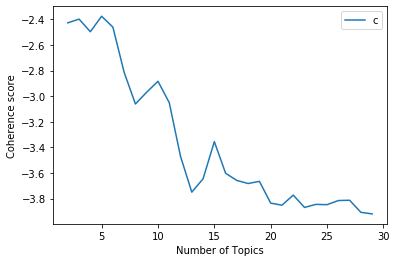

In [18]:
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Create best LSA model

In [40]:
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=best_topic_num, id2word=dictionary)

In [29]:
# Save model
lsi_model.save("lsa_vnese.model")

In [54]:
print("LSI Model:")
 
for idx in range(best_topic_num):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))

LSI Model:
Topic #0: 0.726*"nam" + 0.318*"hai" + 0.280*"thi" + 0.126*"doanh nghiệp" + 0.109*"hlv" + 0.102*"triệu" + 0.089*"usd" + 0.088*"kinh tế" + 0.086*"lan" + 0.083*"thi đấu"
Topic #1: -0.807*"thi" + 0.253*"hai" + -0.170*"hoc" + 0.139*"hlv" + 0.117*"nam" + -0.108*"tuyển sinh" + -0.107*"truong" + -0.105*"sinh" + -0.098*"khong" + 0.093*"thi đấu"
Topic #2: -0.527*"nam" + 0.450*"hai" + 0.269*"thi" + 0.238*"hlv" + 0.153*"chelsea" + 0.144*"pha" + -0.141*"doanh nghiệp" + 0.138*"chiến thắng" + 0.132*"thi đấu" + 0.123*"arsenal"
Topic #3: 0.902*"phim" + 0.184*"vai" + -0.113*"nam" + -0.104*"hlv" + 0.081*"usd" + 0.080*"thuốc" + 0.079*"triệu" + 0.075*"gia đình" + -0.073*"chelsea" + -0.073*"thi đấu"
Topic #4: 0.447*"thuốc" + 0.319*"usd" + -0.304*"phim" + 0.284*"triệu" + -0.249*"nam" + 0.194*"mua" + 0.176*"doanh nghiệp" + 0.170*"gia đình" + 0.143*"hai" + -0.142*"hlv"


## III. Visualization

In [42]:
import multidict as multidict
from wordcloud import WordCloud
import numpy as np
from PIL import Image

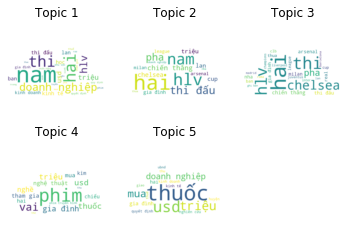

In [50]:
def draw_wordcloud(model, topic_num, word_num=30, save=False):
    ''' Draw the wordclouds for topics 
    Args:
        model: LSA model 
        topic_num: Number of topics
        word_num: Number of words to draw in each cloud 
        save: Save the fig
    ''' 
    # wordcloud mask 
    mask = np.array(Image.open("images/cloud_mask.png"))
    for i in range(topic_num):
        temp = model.show_topic(i, word_num)
        fullTermsDict = multidict.MultiDict()
        for t in temp:
            fullTermsDict.add(t[0], round(t[1]*100)) 
        wc = WordCloud(background_color="white", max_words=50, mask=mask)
        wc.generate_from_frequencies(fullTermsDict)
        plt.subplot(231+i)
        plt.title("Topic %d"%(i+1))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
    if save == True:
        plt.savefig('images/wordcloud.png', dpi=200)
    plt.show()
draw_wordcloud(lsi_model, 5, save=True)

In [27]:
import numpy as np
# Build 2-dimention LSI model for vector visualizing
vis_lsa = models.LsiModel(corpus=corpus, num_topics=2, id2word=dictionary)
left_singular = vis_lsa.projection.u
sigma = np.diag(vis_lsa.projection.s) 

In [30]:
term_matrix = np.dot(left_singular,sigma)
term_matrix[:5]

array([[ 0.65560648,  0.05437788],
       [ 1.7643579 ,  0.52121049],
       [11.06283687, -6.25610047],
       [ 8.75055169,  4.81561937],
       [ 5.80988503,  3.62216319]])

In [31]:
dictionary[0]

'ban ngành'

In [26]:
np.diag(sigma)

array([[604.13817721,   0.        ],
       [  0.        , 442.70529022]])

In [55]:
num = 10
xs = [term_matrix[i][0] for i in range(num)]
ys = [term_matrix[i][1] for i in range(num)]
ns = [dictionary[i] for i in range(num)]


100%|██████████| 10/10 [00:00<00:00, 278.08it/s]


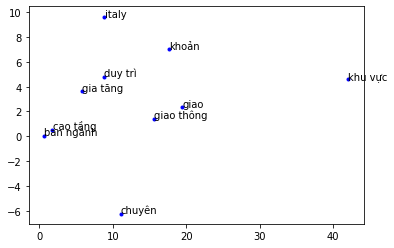

In [58]:
for i in tqdm(range(num)):
    x = xs[i]
    y = ys[i]
    word = ns[i]
    plt.scatter(x, y, marker='.', color='blue')
    plt.text(x+.03, y+.03, word, fontsize=10)
plt.savefig('images/word_vis.png')
plt.show()